## Import Libraries

In [1]:
import json
import os
import random

import numpy as np
import pandas as pd

from collections.abc import MutableMapping
from collections import defaultdict, Counter
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint

## Load Data

In [2]:
# Assuming we are already in the directory
DATA_DIRPATH = os.path.join(os.getcwd(), 'data')
print(DATA_DIRPATH)

/Users/wangxiang/Desktop/VelaInternship/data


### Founder LinkedIn URLs

In [3]:
successful_founder_linkedin_profiles_df = pd.read_csv(os.path.join(DATA_DIRPATH, 'Successful/Moneyball 1.1_ Success - Founder Linkedin URLs.csv'))
unsuccessful_founder_linkedin_profiles_df = pd.read_csv(os.path.join(DATA_DIRPATH, 'Unsuccessful/Moneyball 1.1_ fail - Founder Linkedin URLs.csv'))

In [4]:
successful_founder_linkedin_profiles_df

,org_name,org_uuid,founder_linkedin_url
0,10X Banking,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,https://www.linkedin.com/in/antony-jenkins/
1,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/ben-hindson-09739813/
2,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/serge-saxonov-7b42...
3,"111, Inc.",0680987f-23cd-4fa5-850c-38326fffaa36,https://www.linkedin.com/in/junling-liu-2b90724/
4,17zuoye,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,https://www.linkedin.com/in/dun-xiao-3622629/
...,...,...,...
4063,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,https://www.linkedin.com/in/julianteicke
4064,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,https://www.linkedin.com/in/amirsuissa
4065,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,https://www.linkedin.com/in/teodoro-martino-38...
4066,zolar,4e4c96b5-86a9-4372-9f92-483f135daa86,https://www.linkedin.com/in/gregor-loukidis-03...


In [5]:
unsuccessful_founder_linkedin_profiles_df

,org_name,org_uuid,founder_linkedin_url
0,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/jwsass/
1,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/colinccampbell/
2,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/dirkbhagat/
3,0glass,0ae0c059-31ac-4979-132f-352b31a6d448,https://www.linkedin.com/in/bobosu/
4,100offer,0cebce5a-3efc-dd27-5ce6-a42245a79cf9,https://www.linkedin.com/in/otis-fan-47619247/
...,...,...,...
5993,vidIQ,53baed17-d1ae-3bce-54ca-4db92b796d47,https://www.linkedin.com/in/james-cross-4170231a7
5994,vidIQ,53baed17-d1ae-3bce-54ca-4db92b796d47,http://www.linkedin.com/in/robertsandie
5995,videogram,ad78ca0e-ac31-438d-3f7c-a7dc258a330e,https://www.linkedin.com/in/rahulgolecha
5996,videogram,ad78ca0e-ac31-438d-3f7c-a7dc258a330e,https://www.linkedin.com/in/sandeepcasi


### Enriched Founder LinkedIn Profiles

In [6]:
successful_enriched_linkedin_profiles_df = pd.read_csv(os.path.join(DATA_DIRPATH, 'Successful/success_enriched_linkedin_profiles.csv'))
successful_enriched_linkedin_profiles_df.rename(columns={'linkedin_url': 'founder_linkedin_url'}, inplace=True)

unsuccessful_enriched_linkedin_profiles_df = pd.read_csv(os.path.join(DATA_DIRPATH, 'Unsuccessful/fail_enriched_linkedin_profiles.csv'))
unsuccessful_enriched_linkedin_profiles_df.rename(columns={'linkedin_url': 'founder_linkedin_url'}, inplace=True)
unsuccessful_enriched_linkedin_profiles_df.drop(columns=['create_time'], inplace=True)

In [17]:
successful_enriched_linkedin_profiles_df

,founder_linkedin_url,json_string
0,https://www.linkedin.com/in/ryan-johns-sf/,"{""version"": 1, ""hits"": 2, ""results"": 1, ""kgver..."
1,http://www.linkedin.com/in/smakani,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
2,https://www.linkedin.com/in/obaid-khan-b77b4357/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
3,https://www.linkedin.com/in/alexbuttle,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4,http://www.linkedin.com/in/jonesharry,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
...,...,...
4063,http://www.linkedin.com/in/alessiosignorini,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4064,https://www.linkedin.com/in/jakesussman/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4065,https://www.linkedin.com/in/jerryting/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4066,https://www.linkedin.com/in/amine-anoun/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."


In [18]:
unsuccessful_enriched_linkedin_profiles_df

,founder_linkedin_url,json_string
0,http://www.linkedin.com/pub/pete-foley/3/753/a1a,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
1,https://www.linkedin.com/in/stubaileyblox,"{""version"": 1, ""hits"": 3, ""results"": 1, ""kgver..."
2,https://www.linkedin.com/in/adamellison,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
3,https://www.linkedin.com/in/danielpizzata,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4,https://www.linkedin.com/in/mguctas,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
...,...,...
5993,https://www.linkedin.com/in/james-welsh-8a775363,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
5994,https://www.linkedin.com/in/nick-tackes-a5139850,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
5995,http://www.linkedin.com/in/atakahagi,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
5996,http://www.linkedin.com/in/motoyone,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."


### Company and Long Company Description

In [7]:
successful_company_df = pd.read_csv(os.path.join(DATA_DIRPATH, 'Successful/Moneyball 1.1_ Success - Company.csv'))
unsuccessful_company_df = pd.read_csv(os.path.join(DATA_DIRPATH, 'Unsuccessful/Moneyball 1.1_ Fail - Company.csv'))

successful_long_company_desc_df = pd.read_csv(os.path.join(DATA_DIRPATH, 'Successful/Moneyball 1.1_ Success - Long company descriptions.csv'))
unsuccessful_long_company_desc_df = pd.read_csv(os.path.join(DATA_DIRPATH, 'Unsuccessful/Moneyball 1.1_ Fail - Long company descriptions.csv'))

In [8]:
successful_company_df

,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description
0,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,10X Banking,10xbanking.com,operating,1/1/16,"Banking,Financial Services,FinTech,Software","Financial Services,Lending and Investments,Sof...",GBR,London,10X Banking is a financial service technology ...
1,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,10X Genomics,10xgenomics.com,ipo,1/1/12,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...
2,0680987f-23cd-4fa5-850c-38326fffaa36,"111, Inc.",corporate.111.com.cn,ipo,1/1/10,"Health Care,Medical",Health Care,CHN,Shanghai,"111, Inc. operates as a digital and mobile hea..."
3,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,17zuoye,ucenter.17zuoye.com,ipo,1/1/11,"E-Learning,EdTech,Education,Internet,Language ...","Education,Internet Services,Software",CHN,Shanghai,17zuoye is an online learning platform for K-1...
4,8e5b2628-6d2b-4f0a-9808-07c935156515,1inch,1inch.io,operating,7/9/20,"Blockchain,Cryptocurrency,Information Services...","Financial Services,Information Technology,Othe...",KNA,Old Road Town,1inch Limited builds decentralized protocols a...
...,...,...,...,...,...,...,...,...,...,...
2174,1e3949d8-4839-a9b8-cf12-992948506512,Zum,ridezum.com,operating,2/1/15,"Child Care,Children,Ride Sharing,Transportation","Community and Lifestyle,Health Care,Transporta...",USA,Redwood City,Z≈´m provides child transportation for school ...
2175,df5827b2-997a-4006-a827-9f21df49cade,Zume,zume.com,operating,6/1/15,"Consumer,Food and Beverage,Food Delivery,Manuf...","Food and Beverage,Manufacturing,Other,Transpor...",USA,Camarillo,Zume is a manufacturing technology company foc...
2176,3d90ccb3-eb2c-a9d2-a904-e8ed774ccea2,Zumper,zumper.com,operating,1/1/12,"B2B,Consumer,Mobile,Real Estate,Rental","Commerce and Shopping,Mobile,Other,Real Estate",USA,San Francisco,Zumper is a software platform that connects pe...
2177,542067a6-bb15-eb5d-b01b-a383bb3df7f2,Zwift,zwift.com,operating,1/1/14,"Cycling,Fitness,Sports,Wellness","Health Care,Sports",USA,Long Beach,Zwift operates an online fitness platform used...


In [9]:
unsuccessful_company_df

,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description
0,86bd89a7-fe3f-12d4-817c-8157c8592194,i.Sec,isec.ng,operating,1/1/13,"Finance,FinTech",Financial Services,NGA,Lagos,i.Sec is a financial security service that all...
1,58fd74f2-9ebb-4a41-cd75-05f9214a9a11,Kukua,kukua.me,operating,1/1/15,"Content,EdTech,Franchise,Media and Entertainment","Education,Media and Entertainment,Other,Software",KEN,Nairobi,The edutainment company for children of the 21...
2,e8772824-d8d5-7636-0bd5-40b76511213b,Airdog,airdog.com,operating,1/1/14,"Artificial Intelligence,Drones,Robotics","Artificial Intelligence,Consumer Electronics,C...",LVA,Riga,We build smart robots that bring unprecedented...
3,be72d0fa-b5b0-eb2d-f8aa-3cb290f97b33,Ubiq.ai,ubiq.ai,operating,1/1/15,"Autonomous Vehicles,Car Sharing,Internet,Last ...","Internet Services,Real Estate,Software,Transpo...",AUT,Vienna,Ubiq is shaping the future of urban mobility b...
4,7c9e6d25-8cf0-80a5-dfd6-d1a21337534d,ANKA,anka.africa,operating,1/1/16,"Art,E-Commerce,Fashion,Handmade","Clothing and Apparel,Commerce and Shopping,Con...",CIV,Abidjan,"ANKA is a platform to discover, buy, and sell ..."
...,...,...,...,...,...,...,...,...,...,...
3895,455f7567-6169-c410-d5da-e8c36a6a9a87,FINTRX,fintrx.com,operating,1/1/14,"Big Data,Database,Financial Services,FinTech,H...","Data and Analytics,Financial Services,Lending ...",USA,Boston,FINTRX provides family office intelligence des...
3896,9a9446c6-127c-4cd9-89be-7fa6a4ca0141,Linguavista,linguavista.com,operating,1/1/12,"Consulting,Marketing,Natural Language Processi...","Artificial Intelligence,Data and Analytics,Pro...",USA,Cary,Linguavista is a language services firm that h...
3897,a8913c96-af74-d845-0fd4-de742f725a4c,Lion Street,lionstreet.com,operating,1/1/10,"Finance,Financial Services,Service Industry","Financial Services,Other",USA,Austin,Lion Street is a financial services distributi...
3898,7ec00076-4e5f-4377-91b2-51023807ed82,Transcend Street Solutions,transcendstreet.com,operating,1/1/13,Financial Services,Financial Services,USA,Piscataway,Transcend Street Solutions is a leading provid...


In [10]:
successful_long_company_desc_df

,org_name,org_uuid,long_description
0,10X Banking,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,"10x Banking (10x), a financial services techno..."
1,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,10x Genomics is creating revolutionary DNA seq...
2,"111, Inc.",0680987f-23cd-4fa5-850c-38326fffaa36,"111,Inc. is a leading digital and mobile healt..."
3,17zuoye,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,17zuoye is an online learning platform for K-1...
4,1Komma5¬∞,1ca6a7b3-465b-443d-9028-388cfd1ad060,KOMMA5 ¬∞ offers all owners of electric vehicl...
...,...,...,...
2151,uberall,7a68f73d-7d54-29b1-4f32-948ac9673bbb,Uberall enables SMB and enterprise resellers t...
2152,vArmour,8adc81f0-fa39-3726-bb1e-73a6165dd9fe,VArmour offers data-defined perimeter security...
2153,waresix,13dc504f-7d44-4eb0-87fb-bccc0f55a0bf,Waresix is a logistics platform for freight-fo...
2154,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,wefox is a digital insurance company that sell...


In [11]:
unsuccessful_long_company_desc_df

,org_name,org_uuid,long_description
0,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,.Club Domains is a domain extension for the so...
1,0glass,0ae0c059-31ac-4979-132f-352b31a6d448,0glass is the first high-tech company to apply...
2,100offer,0cebce5a-3efc-dd27-5ce6-a42245a79cf9,100offer is an opportunity marketplace for tal...
3,101 Edu,934bd25a-4b91-9d78-12c3-524c679d3e69,101 builds mobile-first teaching and assessmen...
4,17hats,c852c5d3-220d-2eb6-c78e-3c9148430ce4,17hats has become the small business owners ch...
...,...,...,...
3682,uPlanner,81270604-9a52-c77d-42f8-99bdaa47501f,u-planner is an international technology solut...
3683,upOwa,03cc4cf7-557c-958a-81ec-e2c29d919d02,"upOwa develops, deploys and maintains innovati..."
3684,vidIQ,53baed17-d1ae-3bce-54ca-4db92b796d47,vidIQ is the first YouTube audience developmen...
3685,videogram,ad78ca0e-ac31-438d-3f7c-a7dc258a330e,Cinemacraft is rebanding to Videogram. Videogr...


## Merge DataFrames

### Match Founder LinkedIn URLs with Enriched Founder LinkedIn Profiles

In [27]:
merged_successful_founder_profiles_df = pd.merge(successful_founder_linkedin_profiles_df, successful_enriched_linkedin_profiles_df, on='founder_linkedin_url')
merged_unsuccessful_founder_profiles_df = pd.merge(unsuccessful_founder_linkedin_profiles_df, unsuccessful_enriched_linkedin_profiles_df, on='founder_linkedin_url')

In [28]:
merged_successful_founder_profiles_df

,org_name,org_uuid,founder_linkedin_url,json_string
0,10X Banking,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,https://www.linkedin.com/in/antony-jenkins/,"{""version"": 1, ""hits"": 2, ""results"": 1, ""kgver..."
1,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/ben-hindson-09739813/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
2,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/serge-saxonov-7b42...,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
3,"111, Inc.",0680987f-23cd-4fa5-850c-38326fffaa36,https://www.linkedin.com/in/junling-liu-2b90724/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4,17zuoye,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,https://www.linkedin.com/in/dun-xiao-3622629/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
...,...,...,...,...
4067,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,https://www.linkedin.com/in/julianteicke,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4068,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,https://www.linkedin.com/in/amirsuissa,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4069,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,https://www.linkedin.com/in/teodoro-martino-38...,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4070,zolar,4e4c96b5-86a9-4372-9f92-483f135daa86,https://www.linkedin.com/in/gregor-loukidis-03...,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."


In [29]:
merged_unsuccessful_founder_profiles_df

,org_name,org_uuid,founder_linkedin_url,json_string
0,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/jwsass/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
1,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/colinccampbell/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
2,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/dirkbhagat/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
3,0glass,0ae0c059-31ac-4979-132f-352b31a6d448,https://www.linkedin.com/in/bobosu/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
4,100offer,0cebce5a-3efc-dd27-5ce6-a42245a79cf9,https://www.linkedin.com/in/otis-fan-47619247/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
...,...,...,...,...
5995,vidIQ,53baed17-d1ae-3bce-54ca-4db92b796d47,https://www.linkedin.com/in/james-cross-4170231a7,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
5996,vidIQ,53baed17-d1ae-3bce-54ca-4db92b796d47,http://www.linkedin.com/in/robertsandie,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
5997,videogram,ad78ca0e-ac31-438d-3f7c-a7dc258a330e,https://www.linkedin.com/in/rahulgolecha,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."
5998,videogram,ad78ca0e-ac31-438d-3f7c-a7dc258a330e,https://www.linkedin.com/in/sandeepcasi,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver..."


### Match Company and Long Company Description DataFrames

In [12]:
merged_successfull_company_df = pd.merge(successful_company_df, successful_long_company_desc_df, on='org_uuid')
merged_successfull_company_df.drop(columns=['org_name_y'], inplace=True)
merged_successfull_company_df.rename(columns={'org_name_x': 'org_name'}, inplace=True)

merged_unsuccessfull_company_df = pd.merge(unsuccessful_company_df, unsuccessful_long_company_desc_df, on='org_uuid')
merged_unsuccessfull_company_df.drop(columns=['org_name_y'], inplace=True)
merged_unsuccessfull_company_df.rename(columns={'org_name_x': 'org_name'}, inplace=True)

In [13]:
merged_successfull_company_df

,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,long_description
0,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,10X Banking,10xbanking.com,operating,1/1/16,"Banking,Financial Services,FinTech,Software","Financial Services,Lending and Investments,Sof...",GBR,London,10X Banking is a financial service technology ...,"10x Banking (10x), a financial services techno..."
1,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,10X Genomics,10xgenomics.com,ipo,1/1/12,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...,10x Genomics is creating revolutionary DNA seq...
2,0680987f-23cd-4fa5-850c-38326fffaa36,"111, Inc.",corporate.111.com.cn,ipo,1/1/10,"Health Care,Medical",Health Care,CHN,Shanghai,"111, Inc. operates as a digital and mobile hea...","111,Inc. is a leading digital and mobile healt..."
3,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,17zuoye,ucenter.17zuoye.com,ipo,1/1/11,"E-Learning,EdTech,Education,Internet,Language ...","Education,Internet Services,Software",CHN,Shanghai,17zuoye is an online learning platform for K-1...,17zuoye is an online learning platform for K-1...
4,8e5b2628-6d2b-4f0a-9808-07c935156515,1inch,1inch.io,operating,7/9/20,"Blockchain,Cryptocurrency,Information Services...","Financial Services,Information Technology,Othe...",KNA,Old Road Town,1inch Limited builds decentralized protocols a...,1inch Limited builds decentralized protocols a...
...,...,...,...,...,...,...,...,...,...,...,...
2151,1e3949d8-4839-a9b8-cf12-992948506512,Zum,ridezum.com,operating,2/1/15,"Child Care,Children,Ride Sharing,Transportation","Community and Lifestyle,Health Care,Transporta...",USA,Redwood City,Z≈´m provides child transportation for school ...,"Z≈´m is a provider of safe, efficient, and rel..."
2152,df5827b2-997a-4006-a827-9f21df49cade,Zume,zume.com,operating,6/1/15,"Consumer,Food and Beverage,Food Delivery,Manuf...","Food and Beverage,Manufacturing,Other,Transpor...",USA,Camarillo,Zume is a manufacturing technology company foc...,Zume is actively reducing the world‚Äôs plasti...
2153,3d90ccb3-eb2c-a9d2-a904-e8ed774ccea2,Zumper,zumper.com,operating,1/1/12,"B2B,Consumer,Mobile,Real Estate,Rental","Commerce and Shopping,Mobile,Other,Real Estate",USA,San Francisco,Zumper is a software platform that connects pe...,Zumper is a software platform that connects pe...
2154,542067a6-bb15-eb5d-b01b-a383bb3df7f2,Zwift,zwift.com,operating,1/1/14,"Cycling,Fitness,Sports,Wellness","Health Care,Sports",USA,Long Beach,Zwift operates an online fitness platform used...,Zwift is a provider of an interactive fitness ...


In [14]:
merged_unsuccessfull_company_df

,org_uuid,org_name,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,long_description
0,86bd89a7-fe3f-12d4-817c-8157c8592194,i.Sec,isec.ng,operating,1/1/13,"Finance,FinTech",Financial Services,NGA,Lagos,i.Sec is a financial security service that all...,i.Sec uses technology to bridge the gap that e...
1,58fd74f2-9ebb-4a41-cd75-05f9214a9a11,Kukua,kukua.me,operating,1/1/15,"Content,EdTech,Franchise,Media and Entertainment","Education,Media and Entertainment,Other,Software",KEN,Nairobi,The edutainment company for children of the 21...,Our entertainment and technology platform crea...
2,be72d0fa-b5b0-eb2d-f8aa-3cb290f97b33,Ubiq.ai,ubiq.ai,operating,1/1/15,"Autonomous Vehicles,Car Sharing,Internet,Last ...","Internet Services,Real Estate,Software,Transpo...",AUT,Vienna,Ubiq is shaping the future of urban mobility b...,Ubiq is shaping the future of urban mobility b...
3,7c9e6d25-8cf0-80a5-dfd6-d1a21337534d,ANKA,anka.africa,operating,1/1/16,"Art,E-Commerce,Fashion,Handmade","Clothing and Apparel,Commerce and Shopping,Con...",CIV,Abidjan,"ANKA is a platform to discover, buy, and sell ...","ANKA is a platform to discover, buy, and sell ..."
4,91b7747c-1345-6dd1-0013-14f16733d5dc,Restaumatic,restaumatic.com,operating,1/1/13,"Delivery,E-Commerce,Food Processing","Administrative Services,Commerce and Shopping,...",POL,Zabrze,Restaumatic provides its customers comprehensi...,Restaumatic provides its customers comprehensi...
...,...,...,...,...,...,...,...,...,...,...,...
3682,455f7567-6169-c410-d5da-e8c36a6a9a87,FINTRX,fintrx.com,operating,1/1/14,"Big Data,Database,Financial Services,FinTech,H...","Data and Analytics,Financial Services,Lending ...",USA,Boston,FINTRX provides family office intelligence des...,FINTRX is the preeminent resource for private ...
3683,9a9446c6-127c-4cd9-89be-7fa6a4ca0141,Linguavista,linguavista.com,operating,1/1/12,"Consulting,Marketing,Natural Language Processi...","Artificial Intelligence,Data and Analytics,Pro...",USA,Cary,Linguavista is a language services firm that h...,Linguavista is a language services firm that h...
3684,a8913c96-af74-d845-0fd4-de742f725a4c,Lion Street,lionstreet.com,operating,1/1/10,"Finance,Financial Services,Service Industry","Financial Services,Other",USA,Austin,Lion Street is a financial services distributi...,Lion Street is a financial services distributi...
3685,7ec00076-4e5f-4377-91b2-51023807ed82,Transcend Street Solutions,transcendstreet.com,operating,1/1/13,Financial Services,Financial Services,USA,Piscataway,Transcend Street Solutions is a leading provid...,Transcend is a leading provider of optimizatio...


In [17]:
successful_profiles_structured = pd.read_csv('/Users/wangxiang/Desktop/VelaInternship/data/successful/successful_profiles.csv')

unsuccessful_profiles_structured = pd.read_csv('/Users/wangxiang/Desktop/VelaInternship/data/Unsuccessful/unsuccessful_profiles.csv')

merged_successful_founder_profiles_df = pd.merge(successful_founder_linkedin_profiles_df, successful_profiles_structured, on='founder_linkedin_url')
merged_unsuccessful_founder_profiles_df = pd.merge(unsuccessful_founder_linkedin_profiles_df, unsuccessful_profiles_structured, on='founder_linkedin_url')

In [18]:
unsuccessful_profiles_structured.head()

,founder_linkedin_url,json_string,structured_info,paragraph
0,http://www.linkedin.com/pub/pete-foley/3/753/a1a,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Pete Foley', 'gender': 'Male', 'birt...",Pete Foley is known for their contribution as ...
1,https://www.linkedin.com/in/stubaileyblox,"{""version"": 1, ""hits"": 3, ""results"": 1, ""kgver...","{'name': 'Stuart Bailey', 'gender': '', 'birth...",Stuart Bailey is known for their contribution ...
2,https://www.linkedin.com/in/adamellison,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Adam Ellison', 'gender': '', 'birthD...",Adam Ellison is known for their contribution a...
3,https://www.linkedin.com/in/danielpizzata,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Daniel Pizzata', 'gender': 'Male', '...",Daniel Pizzata is known for their contribution...
4,https://www.linkedin.com/in/mguctas,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Melis Guctas', 'gender': '', 'birthD...",Melis Guctas is known for their contribution a...


|### Match Founders and Companies

In [19]:
successful_company_and_founder_profiles_df = pd.merge(merged_successful_founder_profiles_df, merged_successfull_company_df, on='org_uuid')
successful_company_and_founder_profiles_df.drop(columns=['org_name_y'], inplace=True)
successful_company_and_founder_profiles_df.rename(columns={'org_name_x': 'org_name'}, inplace=True)

unsuccessful_company_and_founder_profiles_df = pd.merge(merged_unsuccessful_founder_profiles_df, merged_unsuccessfull_company_df, on='org_uuid')
unsuccessful_company_and_founder_profiles_df.drop(columns=['org_name_y'], inplace=True)
unsuccessful_company_and_founder_profiles_df.rename(columns={'org_name_x': 'org_name'}, inplace=True)

In [22]:
successful_company_and_founder_profiles_df.head()

,org_name,org_uuid,founder_linkedin_url,json_string,structured_info,paragraph,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,long_description
0,10X Banking,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,https://www.linkedin.com/in/antony-jenkins/,"{""version"": 1, ""hits"": 2, ""results"": 1, ""kgver...","{'name': 'Antony Jenkins', 'gender': 'Male', '...",Antony Jenkins is known for their contribution...,10xbanking.com,operating,1/1/16,"Banking,Financial Services,FinTech,Software","Financial Services,Lending and Investments,Sof...",GBR,London,10X Banking is a financial service technology ...,"10x Banking (10x), a financial services techno..."
1,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/ben-hindson-09739813/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Ben Hindson', 'gender': 'Male', 'bir...",Ben Hindson is known for their contribution as...,10xgenomics.com,ipo,1/1/12,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...,10x Genomics is creating revolutionary DNA seq...
2,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/serge-saxonov-7b42...,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Serge Saxonov', 'gender': 'Male', 'b...",Serge Saxonov is known for their contribution ...,10xgenomics.com,ipo,1/1/12,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...,10x Genomics is creating revolutionary DNA seq...
3,"111, Inc.",0680987f-23cd-4fa5-850c-38326fffaa36,https://www.linkedin.com/in/junling-liu-2b90724/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Junling Liu', 'gender': '', 'birthDa...",Junling Liu is known for their contribution as...,corporate.111.com.cn,ipo,1/1/10,"Health Care,Medical",Health Care,CHN,Shanghai,"111, Inc. operates as a digital and mobile hea...","111,Inc. is a leading digital and mobile healt..."
4,17zuoye,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,https://www.linkedin.com/in/dun-xiao-3622629/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Dun Xiao', 'gender': '', 'birthDate'...",Dun Xiao is known for their contribution as Fo...,ucenter.17zuoye.com,ipo,1/1/11,"E-Learning,EdTech,Education,Internet,Language ...","Education,Internet Services,Software",CHN,Shanghai,17zuoye is an online learning platform for K-1...,17zuoye is an online learning platform for K-1...


In [20]:
successful_company_and_founder_profiles_df.head()
successful_company_and_founder_profiles_df.to_csv('Merged_Successful.csv', index=False)

In [21]:
unsuccessful_company_and_founder_profiles_df.head()
unsuccessful_company_and_founder_profiles_df.to_csv('Merged_Unsuccessful.csv', index=False)

In [31]:
# Build up a column that's sum of all the key info
successful_company_and_founder_profiles_df['integrated_info'] = "Organisation's Name: "+ successful_company_and_founder_profiles_df['org_name'] + " Founder's Info: "+ successful_company_and_founder_profiles_df['paragraph'] + " Company in Categories: " + successful_company_and_founder_profiles_df['category_groups_list'] + " In City: " + successful_company_and_founder_profiles_df['city'] + " The company's short description: " + successful_company_and_founder_profiles_df['short_description'] + " The company's long description: " + successful_company_and_founder_profiles_df['long_description']

In [32]:
successful_company_and_founder_profiles_df['integrated_info'].head()

0    Organisation's Name: 10X Banking Founder's Inf...
1    Organisation's Name: 10X Genomics Founder's In...
2    Organisation's Name: 10X Genomics Founder's In...
3    Organisation's Name: 111, Inc. Founder's Info:...
4    Organisation's Name: 17zuoye Founder's Info: D...
Name: integrated_info, dtype: object

In [33]:
# Build up a column that's sum of all the key info
unsuccessful_company_and_founder_profiles_df['integrated_info'] = "Organisation's Name: "+ unsuccessful_company_and_founder_profiles_df['org_name'] + " Founder's Info: "+ unsuccessful_company_and_founder_profiles_df['paragraph'] + " Company in Categories: " + unsuccessful_company_and_founder_profiles_df['category_groups_list'] + " In City: " + unsuccessful_company_and_founder_profiles_df['city'] + " The company's short description: " + unsuccessful_company_and_founder_profiles_df['short_description'] + " The company's long description: " + unsuccessful_company_and_founder_profiles_df['long_description']

In [34]:
unsuccessful_company_and_founder_profiles_df['integrated_info'].head()

0    Organisation's Name: .Club Domains Founder's I...
1    Organisation's Name: .Club Domains Founder's I...
2    Organisation's Name: .Club Domains Founder's I...
3    Organisation's Name: 0glass Founder's Info: Bo...
4    Organisation's Name: 100offer Founder's Info: ...
Name: integrated_info, dtype: object

In [39]:
unsuccessful_company_and_founder_profiles_df.to_csv(os.path.join(os.getcwd(),'data','Unsuccessful',"Merged_Unsuccessful_V2.csv"))
successful_company_and_founder_profiles_df.to_csv(os.path.join(os.getcwd(),'data','successful',"Merged_Successful_V2.csv"))

In [43]:
unsuccessful_company_and_founder_profiles_df['integrated_info'].loc[10]
#successful_company_and_founder_profiles_df.to_csv(os.path.join(os.getcwd(),'data','successful',"Merged_Successful_V2.csv"))

"Organisation's Name: 1939 Games Founder's Info: Information not available. Company in Categories: Gaming In City: Reykjav√≠k The company's short description: 1939 Games is a indie game development studio that focuses on WWII gaming experiences. The company's long description: 1939 Games is a indie game development studio based in Reykjavik, Iceland. They are focused on WWII gaming experiences and are currently working on a digital collectible card game that goes by the name of KARDS. The game will draw familiar elements from the card game genre and fuse them with classic WWII gaming for an elegant, action packed and fun card game. 1939 Games was founded around the KARDS project in 2015 by former CCP veterans."

## Data Preprocessing

### Delete Null Entries 

#### Key Modifications: Pay Attention To Which Function You are USING!

##### Used dataframe.drop(problematic_indices).reset_index(drop=True) to create and return a new DataFrame without the problematic rows, which avoids modifying the original DataFrame in-place and circumvents the warning.
##### Applied .copy() to the series derived from the DataFrame when performing operations that might otherwise trigger the SettingWithCopyWarning.
##### Ensured the JSON parsing (json.loads) and the subsequent operations are more resilient to data inconsistencies.

##### Safe JSON Loading & Flexible Adjustment 


In [66]:
def process_complex_json(dataframe, json_column_name='json_string'):
    """
    Process a DataFrame containing a complex JSON structure in one of its columns.
    
    Args:
        dataframe (pd.DataFrame): DataFrame containing the complex JSON structure.
        json_column_name (str): Name of the column containing the JSON string.

    Returns:
        pd.DataFrame: A DataFrame with expanded information from the JSON structure.
    """
    # Define a safe JSON loading function
    def safe_json_loads(row):
        try:
            return json.loads(row)
        except (ValueError, TypeError):
            return {}  # Return an empty dict for problematic rows
    
    # Apply the safe JSON loading function
    dataframe[json_column_name] = dataframe[json_column_name].apply(safe_json_loads)
    
    # Initialize a list to hold processed rows
    processed_rows = []
    
    # Iterate over each row in the DataFrame
    for _, row in dataframe.iterrows():
        json_data = row[json_column_name]
        
        # Check if 'data' key is present and not empty
        if json_data.get('data', None):
            # Extract information from the 'data' key
            for item in json_data['data']:
                processed_row = row.copy()  # Start with a copy of the current row
                processed_row['gender'] = item.get('gender', {}).get('normalizedValue', None)
                processed_row['githubUri'] = item.get('githubUri', None)
                processed_row['description'] = item.get('description', None)
                processed_row['skills'] = ', '.join([skill['name'] for skill in item.get('skills', []) if 'name' in skill])
                
                # Add more fields as needed!
                
                processed_rows.append(processed_row)
    
    # Create a new DataFrame from the processed rows
    new_dataframe = pd.DataFrame(processed_rows)
    
    # Drop the original JSON column if no longer needed
    new_dataframe.drop(columns=[json_column_name], inplace=True)
    
    return new_dataframe


In [49]:
# def remove_rows_with_empty_data(dataframe):
#     def remove_problematic_rows(dataframe):
#         series = dataframe['json_string'].copy()
#         problematic_indices = []
#         for index, value in series.items():
#             try:
#                 json.loads(value)
#             except (TypeError, json.JSONDecodeError) as e:
#                 problematic_indices.append(index)
#                 print(f"Error at row {index} with entry: {value}. Error: {e}")
#         # Drop problematic rows and reset index to keep indices aligned
#         return dataframe.drop(problematic_indices).reset_index(drop=True)
#     
#     dataframe = remove_problematic_rows(dataframe)
#     
#     def safe_json_loads(x):
#         try:
#             js = json.loads(x)
#             return js if isinstance(js, dict) and 'data' in js else {'data': None}
#         except ValueError:
#             return {'data': None}
# 
#     # Apply safe_json_loads and reset index to align with original dataframe's index
#     json_string_df = dataframe['json_string'].apply(safe_json_loads).apply(pd.Series).reset_index(drop=True)
#     
#     # Create a boolean mask with the same index as dataframe for filtering
#     mask = json_string_df['data'].apply(lambda x: x != [])
#     
#     # Apply mask to dataframe to filter rows
#     filtered_dataframe = dataframe[mask].reset_index(drop=True)
# 
#     return filtered_dataframe

In [73]:
successful_company_and_founder_profiles_df = process_complex_json(successful_company_and_founder_profiles_df,'json_string')
successful_company_and_founder_profiles_df.head(5)

,org_name,org_uuid,founder_linkedin_url,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,long_description,gender,githubUri,description,skills
0,10X Banking,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,https://www.linkedin.com/in/antony-jenkins/,10xbanking.com,operating,1/1/16,"Banking,Financial Services,FinTech,Software","Financial Services,Lending and Investments,Sof...",GBR,London,10X Banking is a financial service technology ...,"10x Banking (10x), a financial services techno...",Male,None,Antony Peter Jenkins (born 11 July 1961) is a ...,
1,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/ben-hindson-09739813/,10xgenomics.com,ipo,1/1/12,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...,10x Genomics is creating revolutionary DNA seq...,Male,None,"Ben Hindson is the Chief Scientific Officer, C...","Biotechnology, Molecular diagnostics"
2,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/serge-saxonov-7b42...,10xgenomics.com,ipo,1/1/12,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...,10x Genomics is creating revolutionary DNA seq...,Male,None,Serge Saxonov is the Chief Executive Officer a...,"Polymerase chain reaction, research and develo..."
3,"111, Inc.",0680987f-23cd-4fa5-850c-38326fffaa36,https://www.linkedin.com/in/junling-liu-2b90724/,corporate.111.com.cn,ipo,1/1/10,"Health Care,Medical",Health Care,CHN,Shanghai,"111, Inc. operates as a digital and mobile hea...","111,Inc. is a leading digital and mobile healt...",None,None,"Junling Liu is the co-founder, Chairman and CE...",
4,17zuoye,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,https://www.linkedin.com/in/dun-xiao-3622629/,ucenter.17zuoye.com,ipo,1/1/11,"E-Learning,EdTech,Education,Internet,Language ...","Education,Internet Services,Software",CHN,Shanghai,17zuoye is an online learning platform for K-1...,17zuoye is an online learning platform for K-1...,None,None,Dun Xiao is co-founder of 17zuoye.com (a.k.aHo...,"financial services, stock trading, presentatio..."


In [74]:
unsuccessful_company_and_founder_profiles_df = process_complex_json(unsuccessful_company_and_founder_profiles_df,'json_string')
unsuccessful_company_and_founder_profiles_df

,org_name,org_uuid,founder_linkedin_url,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,long_description,gender,githubUri,description,skills
0,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/jwsass/,nic.club,operating,10/10/11,"Domain Registrar,Social,Software","Community and Lifestyle,Internet Services,Soft...",USA,Fort Lauderdale,.Club Domains offers a comprehensive social pl...,.Club Domains is a domain extension for the so...,Male,None,Jeff has 30 years of experience in the technol...,"mass media, economics, teaching, writing, supp..."
1,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/colinccampbell/,nic.club,operating,10/10/11,"Domain Registrar,Social,Software","Community and Lifestyle,Internet Services,Soft...",USA,Fort Lauderdale,.Club Domains offers a comprehensive social pl...,.Club Domains is a domain extension for the so...,Male,None,"An internet pioneer since 1993, Mr. Campbell a...","advertising, marketing, human resource managem..."
2,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/dirkbhagat/,nic.club,operating,10/10/11,"Domain Registrar,Social,Software","Community and Lifestyle,Internet Services,Soft...",USA,Fort Lauderdale,.Club Domains offers a comprehensive social pl...,.Club Domains is a domain extension for the so...,Male,None,Dirk helped to take Hostopia.com public as the...,"programming language, development, webservices..."
3,0glass,0ae0c059-31ac-4979-132f-352b31a6d448,https://www.linkedin.com/in/bobosu/,0glass.cn,operating,1/1/15,"Apps,Artificial Intelligence,Human Computer In...","Apps,Artificial Intelligence,Data and Analytic...",CHN,Shenzhen,Open industrial AR application era .,0glass is the first high-tech company to apply...,None,None,"0glass CEO, China Media University Master of M...","supply chain management, business consulting, ..."
4,100offer,0cebce5a-3efc-dd27-5ce6-a42245a79cf9,https://www.linkedin.com/in/otis-fan-47619247/,en.100offer.com,closed,7/1/14,"Cryptocurrency,E-Commerce Platforms,Employment...","Administrative Services,Commerce and Shopping,...",CHN,Shanghai,100offer is an opportunity marketplace for tal...,100offer is an opportunity marketplace for tal...,None,None,Otis Fan is a Founder at 100offer and is based...,"project lifecycle management, management, econ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,vidIQ,53baed17-d1ae-3bce-54ca-4db92b796d47,https://www.linkedin.com/in/james-cross-4170231a7,vidiq.com,operating,1/1/12,"Advertising,Analytics,Brand Marketing,Content ...","Advertising,Data and Analytics,Internet Servic...",USA,San Francisco,vidIQ is a YouTube audience development and ma...,vidIQ is the first YouTube audience developmen...,None,github.com/jcross,James Cross is a Co-Founder at vidIQ and is ba...,
5710,vidIQ,53baed17-d1ae-3bce-54ca-4db92b796d47,http://www.linkedin.com/in/robertsandie,vidiq.com,operating,1/1/12,"Advertising,Analytics,Brand Marketing,Content ...","Advertising,Data and Analytics,Internet Servic...",USA,San Francisco,vidIQ is a YouTube audience development and ma...,vidIQ is the first YouTube audience developmen...,None,github.com/sandieman,"With over 2M Users, am growing the #1 Chrome E...","startup, cloud, online video, saas, economics,..."
5711,videogram,ad78ca0e-ac31-438d-3f7c-a7dc258a330e,https://www.linkedin.com/in/rahulgolecha,videogram.com,operating,6/3/12,"Advertising,Content Creators,Video","Advertising,Media and Entertainment,Sales and ...",USA,Mountain View,To make video increasingly flexible by analyzi...,Cinemacraft is rebanding to Videogram. Videogr...,None,github.com/rgolecha,"Co-Founder - @Videogram, Peviously Cisco Click...","programming language, development, cms, Java, ..."
5712,videogram,ad78ca0e-ac31-438d-3f7c-a7dc258a330e,https://www.linkedin.com/in/sandeepcasi,videogram.com,operating,6/3/12,"Advertising,Content Creators,Video","Advertising,Media and Entertain

In [76]:
unsuccessful_company_and_founder_profiles_df['json_string']

KeyError: 'json_string'

### Delete Duplicate Profiles

In [24]:
def remove_duplicate_founders(dataframe):
    """
    Remove duplicate rows from a DataFrame based on the 'founder_linkedin_url' field.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing a 'founder_linkedin_url' column.

    Returns:
        pd.DataFrame: A new DataFrame with duplicate rows removed based on 'founder_linkedin_url'.
    """
    # Drop duplicate rows based on 'founder_linkedin_url'
    unique_df = dataframe.drop_duplicates(subset='founder_linkedin_url', keep='first')

    # Reset the index for the unique DataFrame
    unique_df.reset_index(drop=True, inplace=True)

    return unique_df

In [25]:
successful_company_and_founder_profiles_df = remove_duplicate_founders(successful_company_and_founder_profiles_df)
successful_company_and_founder_profiles_df

,org_name,org_uuid,founder_linkedin_url,json_string,structured_info,paragraph,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,long_description
0,10X Banking,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,https://www.linkedin.com/in/antony-jenkins/,"{""version"": 1, ""hits"": 2, ""results"": 1, ""kgver...","{'name': 'Antony Jenkins', 'gender': 'Male', '...",Antony Jenkins is known for their contribution...,10xbanking.com,operating,1/1/16,"Banking,Financial Services,FinTech,Software","Financial Services,Lending and Investments,Sof...",GBR,London,10X Banking is a financial service technology ...,"10x Banking (10x), a financial services techno..."
1,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/ben-hindson-09739813/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Ben Hindson', 'gender': 'Male', 'bir...",Ben Hindson is known for their contribution as...,10xgenomics.com,ipo,1/1/12,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...,10x Genomics is creating revolutionary DNA seq...
2,10X Genomics,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,https://www.linkedin.com/in/serge-saxonov-7b42...,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Serge Saxonov', 'gender': 'Male', 'b...",Serge Saxonov is known for their contribution ...,10xgenomics.com,ipo,1/1/12,"Biotechnology,Genetics,Health Care,Medical","Biotechnology,Health Care,Science and Engineering",USA,Pleasanton,10X Genomics ELV solutions and security system...,10x Genomics is creating revolutionary DNA seq...
3,"111, Inc.",0680987f-23cd-4fa5-850c-38326fffaa36,https://www.linkedin.com/in/junling-liu-2b90724/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Junling Liu', 'gender': '', 'birthDa...",Junling Liu is known for their contribution as...,corporate.111.com.cn,ipo,1/1/10,"Health Care,Medical",Health Care,CHN,Shanghai,"111, Inc. operates as a digital and mobile hea...","111,Inc. is a leading digital and mobile healt..."
4,17zuoye,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,https://www.linkedin.com/in/dun-xiao-3622629/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Dun Xiao', 'gender': '', 'birthDate'...",Dun Xiao is known for their contribution as Fo...,ucenter.17zuoye.com,ipo,1/1/11,"E-Learning,EdTech,Education,Internet,Language ...","Education,Internet Services,Software",CHN,Shanghai,17zuoye is an online learning platform for K-1...,17zuoye is an online learning platform for K-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,https://www.linkedin.com/in/julianteicke,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Julian Teicke', 'gender': 'Male', 'b...",Julian Teicke is known for their contribution ...,wefox.com,operating,1/1/15,"FinTech,Insurance,InsurTech,Software","Financial Services,Software",DEU,Berlin,wefox provides digital insurance services.,wefox is a digital insurance company that sell...
4030,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,https://www.linkedin.com/in/amirsuissa,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Amir Suissa', 'gender': 'Male', 'bir...",Amir Suissa is known for their contribution as...,wefox.com,operating,1/1/15,"FinTech,Insurance,InsurTech,Software","Financial Services,Software",DEU,Berlin,wefox provides digital insurance services.,wefox is a digital insurance company that sell...
4031,wefox,71f7c9a8-f9f0-4d27-b908-6edfa081ba03,https://www.linkedin.com/in/teodoro-martino-38...,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Teodoro Martino', 'gender': '', 'bir...",Teodoro Martino is known for their contributio...,wefox.com,operating,1/1/15,"FinTech,Insurance,InsurTech,Software","Financial Services,Software",DEU,Berlin,wefox provides digital insurance services.,we

In [26]:
unsuccessful_company_and_founder_profiles_df = remove_duplicate_founders(unsuccessful_company_and_founder_profiles_df)
unsuccessful_company_and_founder_profiles_df

,org_name,org_uuid,founder_linkedin_url,json_string,structured_info,paragraph,domain,status,founded_on,category_list,category_groups_list,country_code,city,short_description,long_description
0,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/jwsass/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Jeff Sass', 'gender': 'Male', 'birth...",Jeff Sass is known for their contribution as C...,nic.club,operating,10/10/11,"Domain Registrar,Social,Software","Community and Lifestyle,Internet Services,Soft...",USA,Fort Lauderdale,.Club Domains offers a comprehensive social pl...,.Club Domains is a domain extension for the so...
1,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/colinccampbell/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Colin Campbell', 'gender': 'Male', '...",Colin Campbell is known for their contribution...,nic.club,operating,10/10/11,"Domain Registrar,Social,Software","Community and Lifestyle,Internet Services,Soft...",USA,Fort Lauderdale,.Club Domains offers a comprehensive social pl...,.Club Domains is a domain extension for the so...
2,.Club Domains,477b73e7-f956-955d-06c0-2dc705a7e6de,https://www.linkedin.com/in/dirkbhagat/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Dirk Bhagat', 'gender': 'Male', 'bir...",Dirk Bhagat is known for their contribution as...,nic.club,operating,10/10/11,"Domain Registrar,Social,Software","Community and Lifestyle,Internet Services,Soft...",USA,Fort Lauderdale,.Club Domains offers a comprehensive social pl...,.Club Domains is a domain extension for the so...
3,0glass,0ae0c059-31ac-4979-132f-352b31a6d448,https://www.linkedin.com/in/bobosu/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Bob Su', 'gender': '', 'birthDate': ...",Bob Su is known for their contribution as CEO ...,0glass.cn,operating,1/1/15,"Apps,Artificial Intelligence,Human Computer In...","Apps,Artificial Intelligence,Data and Analytic...",CHN,Shenzhen,Open industrial AR application era .,0glass is the first high-tech company to apply...
4,100offer,0cebce5a-3efc-dd27-5ce6-a42245a79cf9,https://www.linkedin.com/in/otis-fan-47619247/,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Otis Fan', 'gender': '', 'birthDate'...",Otis Fan is known for their contribution as Fo...,en.100offer.com,closed,7/1/14,"Cryptocurrency,E-Commerce Platforms,Employment...","Administrative Services,Commerce and Shopping,...",CHN,Shanghai,100offer is an opportunity marketplace for tal...,100offer is an opportunity marketplace for tal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,vidIQ,53baed17-d1ae-3bce-54ca-4db92b796d47,https://www.linkedin.com/in/james-cross-4170231a7,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'James Cross', 'gender': '', 'birthDa...",James Cross is known for their contribution as...,vidiq.com,operating,1/1/12,"Advertising,Analytics,Brand Marketing,Content ...","Advertising,Data and Analytics,Internet Servic...",USA,San Francisco,vidIQ is a YouTube audience development and ma...,vidIQ is the first YouTube audience developmen...
5707,vidIQ,53baed17-d1ae-3bce-54ca-4db92b796d47,http://www.linkedin.com/in/robertsandie,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Rob Sandie', 'gender': '', 'birthDat...",Rob Sandie is known for their contribution as ...,vidiq.com,operating,1/1/12,"Advertising,Analytics,Brand Marketing,Content ...","Advertising,Data and Analytics,Internet Servic...",USA,San Francisco,vidIQ is a YouTube audience development and ma...,vidIQ is the first YouTube audience developmen...
5708,videogram,ad78ca0e-ac31-438d-3f7c-a7dc258a330e,https://www.linkedin.com/in/rahulgolecha,"{""version"": 1, ""hits"": 1, ""results"": 1, ""kgver...","{'name': 'Rahul Golecha', 'gender': '', 'birth...",Rahul Golecha is known for their contribution ...,videogram.com,operating,6/3/12,"Advertisi

### Delete Reduntant JSON String Entries
Get the entries of a JSON that describes a startup founder's LinkedIn profile,


In [29]:
def get_json_string_key_entries(dataframe):
  key_entries = list()
  for json_string in dataframe['json_string'].tolist():
    key_entries += list(json.loads(json_string).keys())
  return set(key_entries)

In [30]:
successfull_founders_key_entries = get_json_string_key_entries(successful_company_and_founder_profiles_df)
unsuccessfull_founders_key_entries = get_json_string_key_entries(unsuccessful_company_and_founder_profiles_df)

Check for key entries that exist in successfull founder profiles and not unsuccessfull founder profiles (and vice versa).

In [31]:
print("Number of key entries in successful founder profiles: ", len(successfull_founders_key_entries))
print("Number of key entries in unsuccessful founder profiles: ", len(unsuccessfull_founders_key_entries))
print("Number of common key entries in successful and unsuccessful founder profiles: ", len(successfull_founders_key_entries & unsuccessfull_founders_key_entries))
for key_entry in successfull_founders_key_entries & unsuccessfull_founders_key_entries:
  print(f"\t{key_entry}")
print("Number of key entries in successful founder profiles and not in unsuccessful founder profiles: ", len(successfull_founders_key_entries - unsuccessfull_founders_key_entries))
if len(successfull_founders_key_entries - unsuccessfull_founders_key_entries) > 0:
  print(f"\t{successfull_founders_key_entries - unsuccessfull_founders_key_entries}")
print("Number of key entries in unsuccessful founder profiles and not in successful founder profiles: ", len(unsuccessfull_founders_key_entries - successfull_founders_key_entries))
if len(unsuccessfull_founders_key_entries - successfull_founders_key_entries) > 0:
  print(f"\t{unsuccessfull_founders_key_entries - successfull_founders_key_entries}")

Number of key entries in successful founder profiles:  66
Number of key entries in unsuccessful founder profiles:  66
Number of common key entries in successful and unsuccessful founder profiles:  66
	images
	age
	nbIncomingEdges
	diffbotUri
	origin
	nameDetail
	wikipediaPageviewsLastYear
	origins
	allOriginHashes
	phoneNumbers
	politicalAffiliation
	wikipediaPageviewsLastQuarterGrowth
	employments
	educations
	angellistUri
	summary
	weight
	languages
	skills
	nbOrigins
	wikipediaUri
	emailAddresses
	profileChangeProbability
	deathPlace
	parents
	birthDate
	crunchbaseUri
	interests
	allUris
	netWorth
	gender
	types
	locations
	articles
	importance
	facebookUri
	nationalities
	githubUri
	wikipediaPageviewsGrowth
	id
	religion
	instagramUri
	wikipediaPageviewsLastYearGrowth
	type
	location
	name
	wikipediaPageviews
	colleagues
	crawlTimestamp
	allNames
	birthPlace
	youtubeUri
	awards
	googlePlusUri
	image
	twitterUri
	height
	children
	description
	allIds_DiffbotUsage
	allDescriptions
	w

Let's check now the frequency of all key entries among the successful and unsuccessful founders.


In [32]:
def count_json_key_frequencies(dataframe, json_string_keys):
    """
    Counts the occurrences and normalized frequencies of specified keys in a column of JSON strings in a DataFrame.

    Args:
    dataframe (pd.DataFrame): A pandas DataFrame containing a column 'json_string' with JSON data.
    json_string_keys (List[str]): A list of keys to count in the JSON data.

    Returns:
    dict: A dictionary with counts and normalized frequencies of each specified key.
    """
    key_counter = defaultdict(int)
    total_count = 0

    for json_string in dataframe['json_string']:
        try:
            data = json.loads(json_string)
            total_count += 1
            for key in json_string_keys:
                if key in data:
                    key_counter[key] += 1
        except json.JSONDecodeError:
            print("Error decoding JSON from json_string")

    # Calculate normalized frequencies
    normalized_frequencies = {key: count / total_count for key, count in key_counter.items()}

    return {"frequencies": dict(key_counter), "normalized_frequencies": normalized_frequencies}

In [33]:
common_json_string_keys = successfull_founders_key_entries & unsuccessfull_founders_key_entries

successful_founders_json_key_frequencies = count_json_key_frequencies(successful_company_and_founder_profiles_df, common_json_string_keys)
unsuccessful_founders_json_key_frequencies = count_json_key_frequencies(unsuccessful_company_and_founder_profiles_df, common_json_string_keys)

In [34]:
def plot_key_frequencies(success_freq, fail_freq, keys):
    """
    Plots the key frequencies for successful and failed founder profiles.

    Args:
    success_freq (dict): A dictionary with frequencies for successful profiles.
    fail_freq (dict): A dictionary with frequencies for failed profiles.
    keys (List[str]): A list of keys to plot.
    """
    combined_freq = {key: (success_freq['normalized_frequencies'].get(key, 0) + fail_freq['normalized_frequencies'].get(key, 0))/2 for key in keys}
    sorted_keys = sorted(combined_freq, key=combined_freq.get, reverse=True)

    success_counts = [success_freq['normalized_frequencies'].get(key, 0) for key in sorted_keys]
    fail_counts = [fail_freq['normalized_frequencies'].get(key, 0) for key in sorted_keys]

    # Setting the positions and width for the bars
    pos = list(range(len(keys)))
    width = 0.4

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(20, 10))

    # Create a bar with success data,
    plt.bar([p - width/2 for p in pos], success_counts, width, alpha=0.5, color='green', label='Success')

    # Create a bar with fail data,
    plt.bar([p + width/2 for p in pos], fail_counts, width, alpha=0.5, color='red', label='Fail')

    # Set the y axis label
    ax.set_ylabel('Normalized Frequency')

    # Set the chart's title
    ax.set_title('Normalized Frequency of Key Entries in Successful vs Unsuccessful Founder Profiles')

    # Set the position of the x ticks
    ax.set_xticks(pos)

    # Set the labels for the x ticks
    ax.set_xticklabels(sorted_keys, rotation=45, ha='right')

    # Adding the legend and showing the plot
    plt.legend(['Success', 'Fail'], loc='upper right')
    plt.grid()
    plt.tight_layout()
    plt.show()

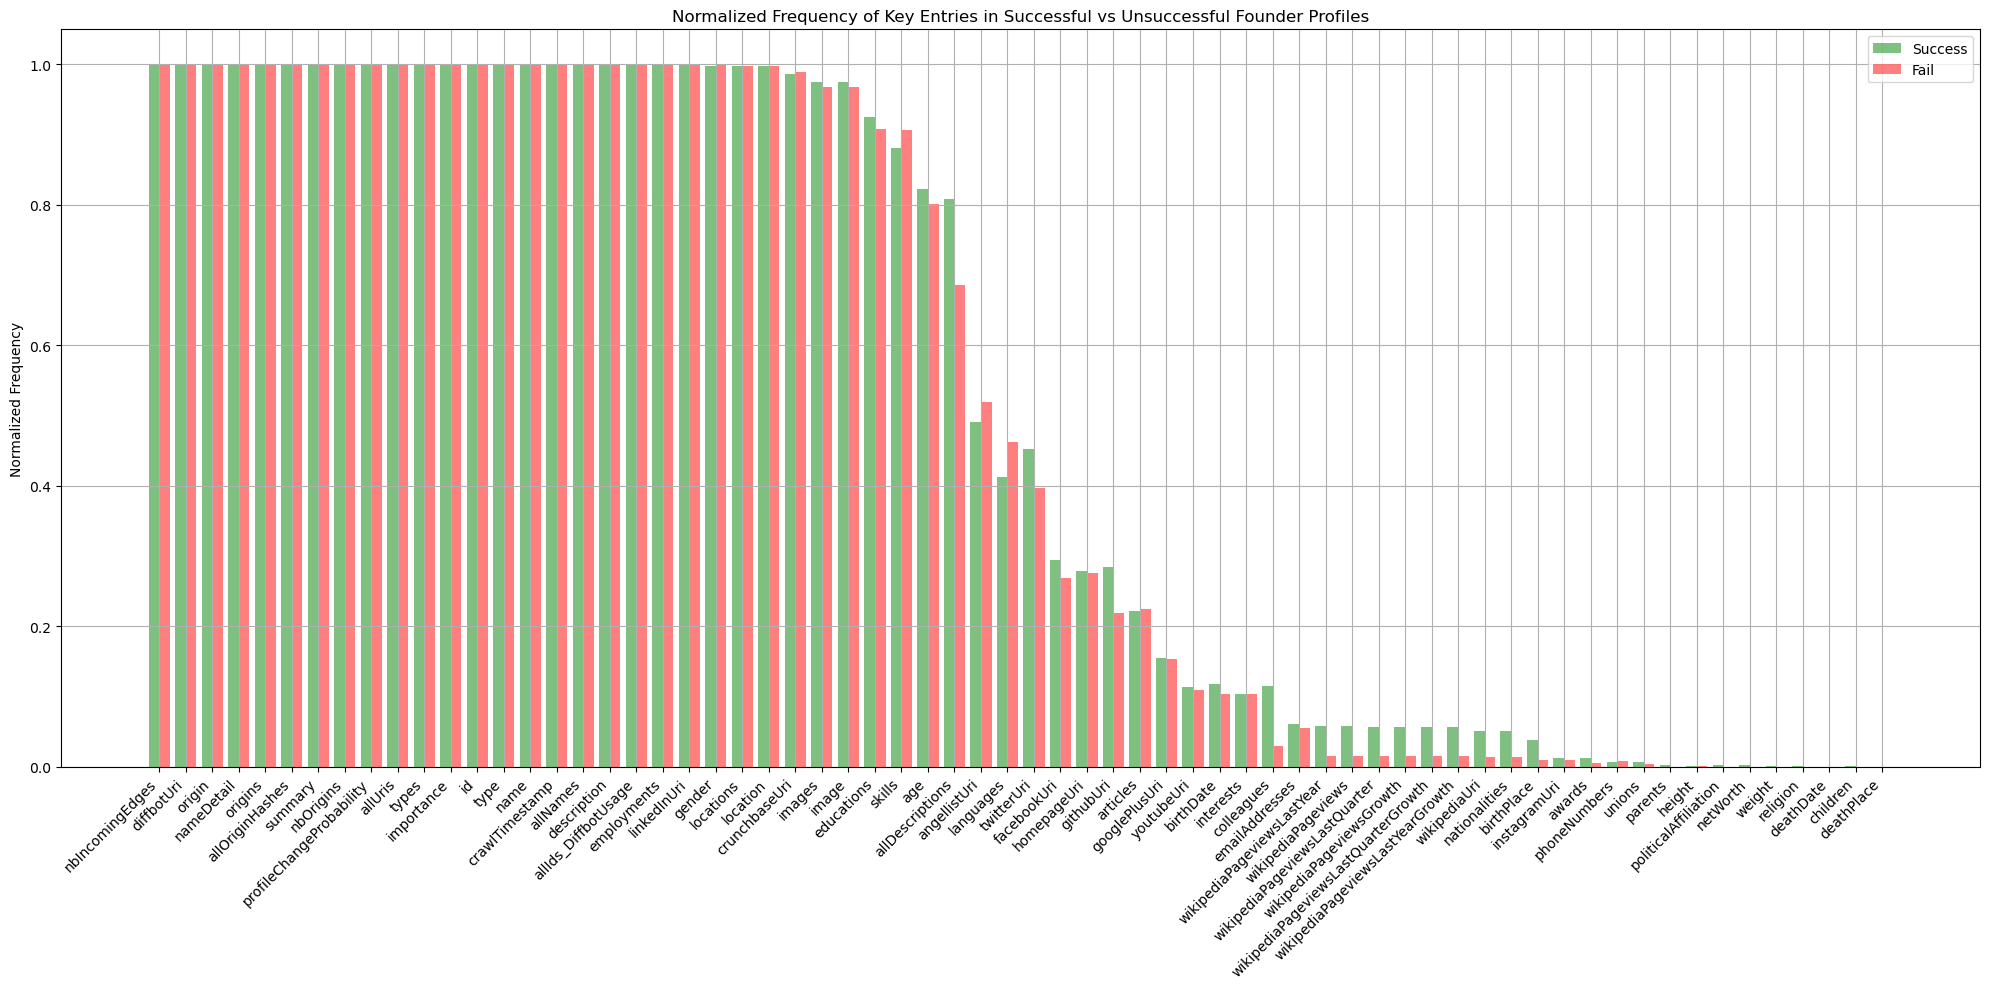

In [35]:
plot_key_frequencies(successful_founders_json_key_frequencies, unsuccessful_founders_json_key_frequencies, common_json_string_keys)

In [36]:
def get_unique_json_key_examples(dataframe, json_keys):
    """
    Retrieves a unique example value for specified keys from different entries in a column of JSON strings in a DataFrame.

    Args:
    dataframe (pd.DataFrame): A pandas DataFrame containing a column with JSON data.
    json_keys (List[str]): A list of keys for which to retrieve unique example values in the JSON data.

    Returns:
    dict: A dictionary with each key associated with a unique example value.
    """
    key_examples = defaultdict(lambda: None)
    used_rows = set()

    json_string_entries = dataframe['json_string'].tolist()
    random.shuffle(json_string_entries)
    for index, json_string in enumerate(json_string_entries):
        if len(used_rows) == len(json_keys):
            break  # Break if examples for all keys have been found

        try:
            data = json.loads(json_string)
            for key in json_keys:
                if key in data and key_examples[key] is None:
                    key_examples[key] = data[key]
                    used_rows.add(index)
                    break  # Move to the next row after finding an example
        except json.JSONDecodeError:
            print(f"Error decoding JSON from json_string at row {index}")

    return dict(key_examples)

In [37]:
key_examples = get_unique_json_key_examples(successful_company_and_founder_profiles_df, common_json_string_keys)
pprint(key_examples)

{'age': 37,
 'allDescriptions': ['Qichao Hu is the Founder & CEO at SES. Qichao was '
                     'previously a postdoc at Massachusetts Institute of '
                     'Technology (MIT) from January 2009 to September 2013. '
                     'Prior to that, they were a PhD at [Harvard '
                     'University](/org/harvard) from September 2007 to January '
                     '2009. Qichao began their career as a summer intern at '
                     'Intel from May 2007 to September 2007.\n'
                     '\n'
                     'Qichao Hu received their BS in Physics from the '
                     'Massachusetts Institute of Technology and their PhD in '
                     'Applied Physics from [Harvard '
                     'University](/org/harvard).\n'
                     '\n'
                     'Some direct reports include Joanne Ban - Chief Legal & '
                     'Corporate Officer, Hans Kim - VP, Head, Korea, and '
        

Based on the frequencies plot and manualy inspections of randomly selected profiles we safely delete the following entries:
- allIds_DiffbotUsage
- allNames
- allOriginHashes
- id
- children
- diffbotUri
- deathDate
- emailAddresses
- height
- nationalities
- images
- locations
- nameDetail
- nbOrigins
- nbIncomingEdges
- netWorth
- phoneNumbers
- types
- wikipediaPageviews
- wikipediaPageviewsLastYearGrowth
- wikipediaPageviewsLastQuarterGrowth
- wikipediaPageviewsGrowth
- profileChangeProbability
- image
- type
- importance

In [38]:
def remove_keys_from_json_strings(json_strings, list_of_key_entries):
    """
    Removes specified key entries from each JSON string in the list.

    Args:
    json_strings (List[str]): A list of JSON strings.
    list_of_key_entries (List[str]): A list of key entries to be removed from the JSON data.

    Returns:
    List[str]: A list of modified JSON strings with specified key entries removed.
    """
    modified_json_strings = []

    for json_string in json_strings:
        try:
            data = json.loads(json_string)
            # Remove specified keys
            for key in list_of_key_entries:
              if key in data:
                data.pop(key)
            modified_json_strings.append(json.dumps(data))
        except json.JSONDecodeError:
            print("Error decoding JSON from json_string")

    return modified_json_strings

In [39]:
list_of_key_entries = [
        "allIds_DiffbotUsage", "allNames", "allOriginHashes", "id", "children",
        "diffbotUri", "deathDate", "emailAddresses", "height", "nationalities",
        "images", "locations", "nameDetail", "nbOrigins", "nbIncomingEdges",
        "netWorth", "phoneNumbers", "types", "wikipediaPageviewsLastYearGrowth",
        "wikipediaPageviewsLastQuarterGrowth", "wikipediaPageviewsGrowth",
        "wikipediaPageviewsLastQuarter", "wikipediaPageviewsLastYear", 
        "wikipediaPageviews", "profileChangeProbability", "image", "type",
        "importance", "origin", "origins", "wikipediaUri", "crunchbaseUri",
        "linkedInUri"
    ]

In [40]:
successful_company_and_founder_profiles_df['json_string'] = remove_keys_from_json_strings(successful_company_and_founder_profiles_df['json_string'].tolist(), list_of_key_entries)
unsuccessful_company_and_founder_profiles_df['json_string'] = remove_keys_from_json_strings(unsuccessful_company_and_founder_profiles_df['json_string'].tolist(), list_of_key_entries)

/var/folders/_y/s2b5fxc96cg4w1l93q7x91q40000gn/T/ipykernel_7159/3072444541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_company_and_founder_profiles_df['json_string'] = remove_keys_from_json_strings(successful_company_and_founder_profiles_df['json_string'].tolist(), list_of_key_entries)
/var/folders/_y/s2b5fxc96cg4w1l93q7x91q40000gn/T/ipykernel_7159/3072444541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsuccessful_company_and_founder_profiles_df['json_string'] = remove_keys_from_

Let's see how the json_string of the first profile from successful founders looks like. As we can see there are a lot of reduntant information coming from the scrapinf bot that we have to remove in the next step.

In [41]:
json.loads(successful_company_and_founder_profiles_df['json_string'].iloc[0])

{'gender': {'normalizedValue': 'Male'},
 'description': 'Antony Peter Jenkins (born 11 July 1961) is a British business executive. Since 2016 he has been the chief executive officer of 10x Future Technologies, which he founded. He was the group chief executive of Barclays from 30 August 2012 until his dismissal on 8 July 2015.',
 'educations': [{'institution': {'summary': 'Collegiate research university in Oxford, England',
    'image': 'https://kg.diffbot.com/image/api/get?fetch=yes&url=g%3Cj7P0St0DnBJf.x0KwLZrUn.%5B%3CR0Aa4Hh%3B%5Bv738ZqOr7U%3FGvvT%3Etf2%5Cu0-pOcN%5E1KoKf-wn%3DG%7EHm.c7%3E',
    'types': ['Organization', 'Corporation', 'Company'],
    'name': 'University of Oxford',
    'diffbotUri': 'http://diffbot.com/entity/El7XC-90AODCTd_LCSWoHxg',
    'targetDiffbotUri': 'http://diffbot.com/entity/El7XC-90AODCTd_LCSWoHxg',
    'targetDiffbotId': 'El7XC-90AODCTd_LCSWoHxg',
    'surfaceForm': 'University of Oxford',
    'type': 'Organization'},
   'isCurrent': False,
   'major': {

### Preprocess Json String

In [42]:
def preprocess_employments(json_data):
    """
    Preprocesses employment data from JSON format, simplifying and restructuring the information.

    Args:
    json_data (dict): A dictionary representing JSON data containing employment records.

    Returns:
    list: A list of simplified employment dictionaries. Each dictionary includes simplified categories,
          employer information, converted date strings for 'from' and 'to' fields, the location address,
          and retains 'description', 'title', and 'isCurrent' fields if present, and adds the duration in 
          years between 'from' and 'to' dates when both are available.
    """
    simplified_data = []

    for employment in json_data:
        simplified_employment = {}

        # Simplify employer
        if 'employer' in employment:
          simplified_employment['employer'] = {
              'name': employment['employer'].get('name', ''),
              'summary': employment['employer'].get('summary', ''),
              'types': employment['employer'].get('types', [])
          }

        # Simplifying from and to dates
        for key in ['from', 'to']:
            if key in employment:
                timestamp = employment[key]['timestamp'] / 1000  # Convert to seconds
                try:
                  date_str = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d')
                  simplified_employment[key] = date_str
                except ValueError:
                  simplified_employment[key] = None
        
        from_date, to_date = simplified_employment.get('from'), simplified_employment.get('to')
        if from_date and to_date:
            from_date_obj = datetime.strptime(from_date, '%Y-%m-%d')
            to_date_obj = datetime.strptime(to_date, '%Y-%m-%d')
            duration_years = (to_date_obj - from_date_obj).days / 365.25
            simplified_employment['from'] = from_date
            simplified_employment['to'] = to_date
            simplified_employment['duration'] = round(duration_years, 2)  # Duration in years, rounded to 2 decimal places

        # Simplifying location
        if 'location' in employment:
            simplified_employment['location'] = employment['location'].get('address', '')

        if 'description' in employment:
          simplified_employment['description'] = employment['description']
        if 'title' in employment:
          simplified_employment['title'] = employment['title']
        if 'isCurrent' in employment:
          simplified_employment['isCurrent'] = employment['isCurrent']

        simplified_data.append(simplified_employment)

    return simplified_data


def preprocess_education(json_data):
    """
    Preprocesses education data from JSON format, simplifying and restructuring the information.

    Args:
    json_data (list): A list of dictionaries representing JSON data containing education records.

    Returns:
    list: A list of simplified education dictionaries. Each dictionary includes the degree name,
          institution name and summary, converted date strings for 'from' and 'to' fields,
          the major's name, and retains the 'isCurrent' field if present, and adds the duration in 
          years between 'from' and 'to' dates when both are available.
    """
    simplified_data = []

    for education in json_data:
        simplified_education = {}

        # Simplifying degree
        if 'degree' in education:
            simplified_education['degree'] = education['degree'].get('name', '')

        # Simplify institution
        if 'institution' in education:
            simplified_education['institution'] = {
                'name': education['institution'].get('name', ''),
                'summary': education['institution'].get('summary', '')
            }

        # Simplifying from and to dates
        for key in ['from', 'to']:
            if key in education:
                timestamp = education[key]['timestamp'] / 1000  # Convert to seconds
                try:
                  date_str = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d')
                  simplified_education[key] = date_str
                except ValueError:
                  simplified_education[key] = None

        from_date, to_date = simplified_education.get('from'), simplified_education.get('to')
        if from_date and to_date:
            from_date_obj = datetime.strptime(from_date, '%Y-%m-%d')
            to_date_obj = datetime.strptime(to_date, '%Y-%m-%d')
            duration_years = (to_date_obj - from_date_obj).days / 365.25
            simplified_education['from'] = from_date
            simplified_education['to'] = to_date
            simplified_education['duration'] = round(duration_years, 2)  # Duration in years, rounded to 2 decimal places

        # Simplifying major
        if 'major' in education:
            simplified_education['major'] = education['major'].get('name', '')

        # Retaining 'isCurrent' if present
        if 'isCurrent' in education:
            simplified_education['isCurrent'] = education['isCurrent']

        simplified_data.append(simplified_education)

    return simplified_data


def preprocess_articles(json_data):
    """
    Preprocesses article data from JSON format, simplifying and restructuring the information.

    Args:
    json_data (list): A list of dictionaries representing JSON data containing article records.

    Returns:
    list: A list of simplified article dictionaries. Each dictionary includes the article's name
          and a list of website URIs associated with the article.
    """
    simplified_data = []

    for article in json_data:
        simplified_data.append(article.get('name', ''))

    return simplified_data


def preprocess_skills(json_data):
    """
    Preprocesses skills data from JSON format, simplifying and restructuring the information.

    Args:
    json_data (list): A list of dictionaries representing JSON data containing skill records.

    Returns:
    list: A list of simplified skill dictionaries. Each dictionary includes only the skill's name.
    """
    simplified_data = []

    for skill in json_data:
        simplified_data.append(skill.get('name', ''))

    return simplified_data


def preprocess_location(json_data):
    """
    Preprocesses location data from JSON format, simplifying and restructuring the information.

    Args:
    json_data (dict): A dictionary representing JSON data containing a location record.

    Returns:
    dict: A simplified location dictionary, including only the address and isCurrent fields.
    """
    simplified_location = {
        'address': json_data.get('address', ''),
        'isCurrent': json_data.get('isCurrent', False)
    }

    return simplified_location


def preprocess_birthplace(json_data):
    """
    Preprocesses birtPlace data from JSON format, simplifying and restructuring the information.

    Args:
    json_data (dict): A dictionary representing JSON data containing a birth location record.

    Returns:
    str: A simplified birthplace str, including only the address.
    """

    return json_data.get('address', '')


def preprocess_birthdate(json_data):
    """
    Preprocesses birtDate data from JSON format, simplifying and restructuring the information.

    Args:
    json_data (dict): A dictionary representing JSON data containing a birth date record.

    Returns:
    str: A simplified birthdate str, including only the birthdate string.
    """

    date = json_data.get('str', '')[1:].replace('XX', '01')
    return date


def preprocess_languages(json_data):
    """
    Preprocesses languages data from JSON format, simplifying and restructuring the information.

    Args:
    json_data (list): A list of dictionaries representing JSON data containing languages records.

    Returns:
    list: A list of simplified skill dictionaries. Each dictionary includes only the language's name.
    """
    languages = []
    for language in json_data:
        if 'normalizedValue' in language:
          languages.append(language['normalizedValue'].capitalize())
        else:
          languages.append(language['str'].capitalize())

    return languages


def preprocess_gender(json_data):
    """
    Preprocesses gender data from JSON format, simplifying and restructuring the information.

    Args:
    json_data (dict): A dict containing gender data.
    
    Returns:
    str: A list of simplified gender st
    """
    if 'normalizedValue' in json_data:
        gender = json_data['normalizedValue'].capitalize()
    else:
        gender = json_data['str'].capitalize()
    return gender

In [43]:
def preprocess_json_string(json_string):
    # Load JSON data
    data = json.loads(json_string)

    # Preprocess employments, education, articles, location, skills
    # birthPlace, birthDate, languages, gender if they exist in data
    if 'employments' in data:
        data['employments'] = preprocess_employments(data['employments'])
    if 'educations' in data:  # Replace 'education' with the correct key if different
        data['educations'] = preprocess_education(data['educations'])
    if 'articles' in data:
        data['articles'] = preprocess_articles(data['articles'])
    if 'skills' in data:
        data['skills'] = preprocess_skills(data['skills'])
    if 'location' in data:
        data['location'] = preprocess_location(data['location'])
    if 'birthPlace' in data:
        data['birthPlace'] = preprocess_birthplace(data['birthPlace'])
    if 'birthDate' in data:
        data['birthDate'] = preprocess_birthdate(data['birthDate'])  
    if 'languages' in data:
        data['languages'] = preprocess_languages(data['languages'])
    if 'gender' in data:
        data['gender'] = preprocess_gender(data['gender'])

    return json.dumps(data)

In [44]:
successful_company_and_founder_profiles_df['json_string'] = successful_company_and_founder_profiles_df['json_string'].apply(preprocess_json_string)
unsuccessful_company_and_founder_profiles_df['json_string'] = unsuccessful_company_and_founder_profiles_df['json_string'].apply(preprocess_json_string)

/var/folders/_y/s2b5fxc96cg4w1l93q7x91q40000gn/T/ipykernel_7159/2595516539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_company_and_founder_profiles_df['json_string'] = successful_company_and_founder_profiles_df['json_string'].apply(preprocess_json_string)
/var/folders/_y/s2b5fxc96cg4w1l93q7x91q40000gn/T/ipykernel_7159/2595516539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsuccessful_company_and_founder_profiles_df['json_string'] = unsuccessful_company_and_founder_profiles_df['js

### Feature: Age at Founding

In [45]:
def calculate_founder_age_at_founding(row):
    """
    Adds the 'founder_age_at_founding' value within the 'processed_json_string' column.

    Args:
        row (pandas.Series): A row from the DataFrame.

    Returns:
        str: The updated 'processed_json_string' with the 'age' field added.
    """
    founded_date = pd.to_datetime(row['founded_on'])
    json_data = json.loads(row['json_string'])
    crawl_timestamp = pd.to_datetime(json_data['crawlTimestamp'], unit='s')  # Convert Unix timestamp to datetime
    age_diff = (crawl_timestamp - founded_date).days // 365  # Calculate age in years
    try:
      json_data['age_at_founding'] = json_data['age'] - age_diff
    except:
       json_data['age_at_founding'] = None
    updated_json_string = json.dumps(json_data)  # Serialize the JSON back to a string
    return updated_json_string

In [46]:
successful_company_and_founder_profiles_df['json_string'] = successful_company_and_founder_profiles_df.apply(calculate_founder_age_at_founding, axis=1)
unsuccessful_company_and_founder_profiles_df['json_string'] = unsuccessful_company_and_founder_profiles_df.apply(calculate_founder_age_at_founding, axis=1)

/var/folders/_y/s2b5fxc96cg4w1l93q7x91q40000gn/T/ipykernel_7159/3442258421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_company_and_founder_profiles_df['json_string'] = successful_company_and_founder_profiles_df.apply(calculate_founder_age_at_founding, axis=1)
/var/folders/_y/s2b5fxc96cg4w1l93q7x91q40000gn/T/ipykernel_7159/3442258421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsuccessful_company_and_founder_profiles_df['json_string'] = unsuccessful_company_and_founder_profiles_df

Let's look again at the profile of the first in order successful founder in our dataset

In [47]:
json.loads(successful_company_and_founder_profiles_df['json_string'].iloc[0])

{'gender': 'Male',
 'description': 'Antony Peter Jenkins (born 11 July 1961) is a British business executive. Since 2016 he has been the chief executive officer of 10x Future Technologies, which he founded. He was the group chief executive of Barclays from 30 August 2012 until his dismissal on 8 July 2015.',
 'educations': [{'degree': "Master's (6 year program)",
   'institution': {'name': 'University of Oxford',
    'summary': 'Collegiate research university in Oxford, England'},
   'from': '1982-01-01',
   'to': '1983-01-01',
   'duration': 1.0,
   'major': 'Philosophy',
   'isCurrent': False},
  {'institution': {'name': 'University College Oxford',
    'summary': 'Constituent College of Oxford University'}},
  {'degree': "Master's (6 year program)",
   'institution': {'name': 'Cranfield School of Management',
    'summary': 'Business school in the UK'},
   'major': ''},
  {'degree': "Bachelor's (4 year program)",
   'institution': {'name': 'University of Oxford',
    'summary': 'Col

## Exploratory Data Analysis

### Educations

In [48]:
def parse_educations(dataframe):
    degree_counts = {}
    major_counts = {}

    for index, row in dataframe.iterrows():
        try:
            educations = json.loads(row['json_string'])['educations']
            for education in educations:
                # Update degree count
                degree = education.get('degree', 'Unknown')
                if degree not in degree_counts:
                    degree_counts[degree] = 1
                else:
                    degree_counts[degree] += 1

                # Extract the major, if available
                major = education.get('major')
                if major:
                    if major not in major_counts:
                        major_counts[major] = 1
                    else:
                        major_counts[major] += 1
        except:
            continue

    return degree_counts, major_counts

In [49]:
successful_founders_degree_counts, successful_founders_major_counts = parse_educations(successful_company_and_founder_profiles_df)
unsuccessful_founders_degree_counts, unsuccessful_founders_major_counts = parse_educations(unsuccessful_company_and_founder_profiles_df)

k = 20 # This can be changed! 
successful_founders_topk_degree_counts = dict(sorted(successful_founders_degree_counts.items(), key=lambda item: item[1], reverse=True)[:k])
unsuccessful_founders_topk_degree_counts = dict(sorted(unsuccessful_founders_degree_counts.items(), key=lambda item: item[1], reverse=True)[:k])

In [50]:
def plot_degree_counts(degree_counts, title='Degree Counts', xlabel='Degree Type', ylabel='Counts', rotation=90, color='skyblue'):
    """
    Plots a bar chart of degree counts.

    Args:
        degree_counts: dict, a dictionary with degree types as keys and counts as values.
        title: str, the title of the plot. Default is 'Degree Counts'.
        xlabel: str, the label for the x-axis. Default is 'Degree Type'.
        ylabel: str, the label for the y-axis. Default is 'Counts'.
        rotation: int, the rotation angle of x-axis labels. Default is 90 degrees.
        color: str, the color of the bars. Default is 'skyblue'.

    Returns:
    None, displays a matplotlib bar chart.
    """
    plt.figure(figsize=(10, 6))
    plt.bar(degree_counts.keys(), degree_counts.values(), color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

In [51]:
list(successful_founders_topk_degree_counts.keys())

["Bachelor's (4 year program)",
 "Master's (6 year program)",
 'Unknown',
 'PhD or other Doctorate',
 'High School or Equivalent',
 '-',
 'Certificate/License',
 'unknown',
 'Degree',
 'Diploma',
 '',
 'GRADUATED',
 "Associate's (2 year program)",
 'Economics',
 'Graduate',
 'GRADUATE',
 'Computer Science',
 'BEng',
 'Executive Education',
 'LLB']

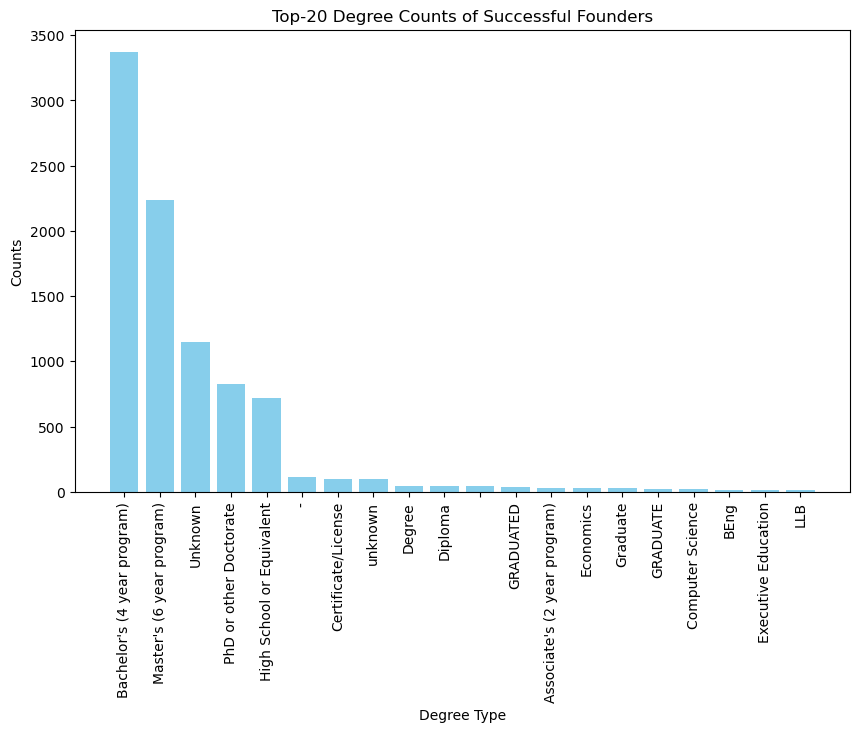

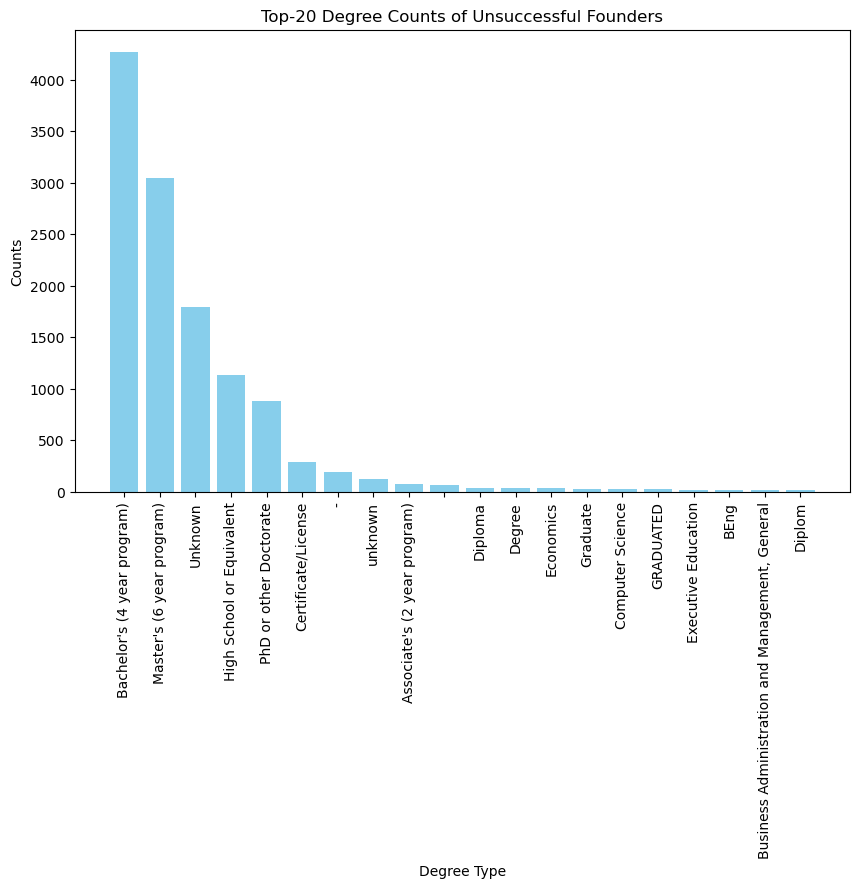

In [52]:
plot_degree_counts(successful_founders_topk_degree_counts, title=f'Top-{k} Degree Counts of Successful Founders')
plot_degree_counts(unsuccessful_founders_topk_degree_counts, title=f'Top-{k} Degree Counts of Unsuccessful Founders')

In [53]:
dict(sorted(successful_founders_major_counts.items(), key=lambda item: item[1], reverse=True))

{'Computer Science': 640,
 'Economics': 187,
 'unknown': 176,
 'Electrical Engineering': 174,
 'Mechanical Engineering': 121,
 'Computer Engineering': 86,
 'Finance': 80,
 'Physics': 78,
 'Chemical Engineering': 60,
 'Business Administration': 60,
 'Chemistry': 58,
 'Mathematics': 58,
 'Engineering': 56,
 'Business': 45,
 'Law': 43,
 'Biochemistry': 42,
 'Information Technology': 37,
 'Marketing': 33,
 'Industrial Engineering': 32,
 'Management': 31,
 'Electrical and Electronics Engineering': 30,
 'Accounting': 28,
 'Computer Science and Engineering': 26,
 'Biology': 25,
 'Political Science': 25,
 'Medicine': 22,
 'Electrical Engineering and Computer Science': 22,
 'Mathematics and Computer Science': 22,
 'Electrical and Computer Engineering': 21,
 'Molecular Biology': 21,
 'Civil Engineering': 21,
 'History': 20,
 'Aerospace Engineering': 20,
 'Business Administration and Management, General': 19,
 'International Business': 19,
 'Software Engineering': 18,
 'Materials Science and Engi

In [54]:
dict(sorted(unsuccessful_founders_major_counts.items(), key=lambda item: item[1], reverse=True))

{'Computer Science': 523,
 'Economics': 196,
 'Electrical Engineering': 189,
 'unknown': 182,
 'Mechanical Engineering': 168,
 'Computer Engineering': 94,
 'Finance': 82,
 'Marketing': 78,
 'Physics': 75,
 'Business Administration': 70,
 'Business Administration and Management, General': 67,
 'Law': 62,
 'Business': 56,
 'Chemical Engineering': 54,
 'Information Technology': 52,
 'Electrical and Electronics Engineering': 50,
 'Engineering': 49,
 'Mathematics': 47,
 'Chemistry': 38,
 'Management': 37,
 'Accounting': 37,
 'Psychology': 36,
 'Industrial Engineering': 34,
 'Biomedical Engineering': 33,
 'Biology': 33,
 'Civil Engineering': 31,
 'Electrical and Computer Engineering': 29,
 'International Business': 27,
 'Biochemistry': 26,
 'Philosophy': 26,
 'Commerce': 26,
 'Entrepreneurship/Entrepreneurial Studies': 26,
 'Business Management': 25,
 'History': 24,
 'Medicine': 23,
 'Architecture': 23,
 'Political Science': 22,
 'Electrical Engineering and Computer Science': 22,
 'Entrepren

### Employments

In [55]:
# Initialize counters for each field
field_counts = {
    'employer': 0, 'from': 0, 'to': 0, 'duration': 0,
    'location': 0, 'title': 0, 'isCurrent': 0,
    'employer.name': 0, 'employer.summary': 0, 'employer.types': 0
}
empty_counts = field_counts.copy()

# Function to update counts for a single employment entry
def update_counts(entry, field_counts, empty_counts):
    for field in field_counts.keys():
        if '.' in field:  # Nested fields within 'employer'
            parent, child = field.split('.')
            if parent in entry and child in entry[parent]:
                field_counts[field] += 1
                if not entry[parent][child]:
                    empty_counts[field] += 1
        else:  # Top-level fields
            if field in entry:
                field_counts[field] += 1
                if not entry[field]:
                    empty_counts[field] += 1

# Iterate over each row in the DataFrame
for index, row in successful_company_and_founder_profiles_df.iterrows():
    employments_json = json.loads(row['json_string'])
    if 'employments' in employments_json:
        for employment_entry in employments_json['employments']:
            update_counts(employment_entry, field_counts, empty_counts)

# Calculate percentages
percentages = {field: (empty_counts[field] / field_counts[field] * 100) if field_counts[field] > 0 else None for field in field_counts}
# Generate a nice message for each category's empty field percentage
messages = []
for category, percentage in percentages.items():
    message = f"The percentage of empty fields for '{category}' is {percentage:.2f}%."
    messages.append(message)

# Join messages into a single string for display
print("\n".join(messages))

The percentage of empty fields for 'employer' is 0.00%.
The percentage of empty fields for 'from' is 0.00%.
The percentage of empty fields for 'to' is 0.00%.
The percentage of empty fields for 'duration' is 3.03%.
The percentage of empty fields for 'location' is 12.11%.
The percentage of empty fields for 'title' is 0.00%.
The percentage of empty fields for 'isCurrent' is 66.20%.
The percentage of empty fields for 'employer.name' is 0.00%.
The percentage of empty fields for 'employer.summary' is 14.50%.
The percentage of empty fields for 'employer.types' is 12.92%.


## Export Data 

In [60]:
os.makedirs(os.path.join(DATA_DIRPATH, 'preprocessed'), exist_ok=True)

In [56]:
successful_company_and_founder_profiles_df.to_csv(os.path.join(DATA_DIRPATH, 'preprocessed', 'successful_company_and_founder_profiles.csv'), index=False)
unsuccessful_company_and_founder_profiles_df.to_csv(os.path.join(DATA_DIRPATH, 'preprocessed', ''), index=False)